<hr style="height:10px;color:black">

<h1 style='color:blue' align='center'>Importing libraries</h1>

<hr style="height:2px;color:black;">
Libraries

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import PIL.Image as Image
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

<hr style="height:10px;color:blue">

<h1 style='color:blue' align='center'>Exploring and Organizating<h1>

<hr style="height:2px;color:black;">
Getting folders

In [15]:
from pathlib import Path

# Path.cwd() is the current working directory
# Path('chest_xray') is the folder where the files are
# path is the location for the files
path = Path.cwd()/ Path('chest_xray')

#list all folders with x-ray files
list_folders = [p for p in path.rglob('*') if p.is_dir()]
list_folders = list_folders[2:]
list_folders

[WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/PNEUMONIA'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/train/NORMAL'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/train/PNEUMONIA')]

<hr style="height:2px;color:black;">
Split all x-ray files

In [16]:
test_normal = [p for p in list_folders[0].rglob('*') if p.is_file()]
test_pneumonia = [p for p in list_folders[1].rglob('*') if p.is_file()]
train_normal = [p for p in list_folders[2].rglob('*') if p.is_file()]
train_pneumonia = [p for p in list_folders[3].rglob('*') if p.is_file()]

<hr style="height:2px;color:black;">
Exploring data

In [17]:
test_normal

[WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL/IM-0001-0001.jpeg'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL/IM-0003-0001.jpeg'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL/IM-0005-0001.jpeg'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL/IM-0006-0001.jpeg'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL/IM-0007-0001.jpeg'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL/IM-0009-0001.jpeg'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL/IM-0010-0001.jpeg'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL/IM-0011-0001.jpeg'),
 WindowsPath('F:/GEIA/CNN/Transfer Learning/chest_xray/test/NORMAL/IM-0013-0001.jpeg'),
 WindowsPath('F:/GEIA/

<hr style="height:2px;color:black;">
Exploring data

In [18]:
print('test files normal/pneumonia: ', len(test_normal) , '/' , len(test_pneumonia))
print('train files normal/pneumonia: ', len(train_normal) , '/' , len(train_pneumonia))

test files normal/pneumonia:  234 / 390
train files normal/pneumonia:  1341 / 3875


<hr style="height:2px;color:black;">
Conversions functions

In [19]:
def file_path_to_image_pil(path):
    return Image.open(str(path))

def file_path_to_image_numpy(path):
    return np.array(Image.open(str(path)))

def image_numpy_to_image_numpy_resize(image_np):
    return cv2.resize(image_np,(224,224))

def image_numpy_to_image_pil(image_np):
    return Image.fromarray(image_np)
    image1 = np.array(Image.open(str(image)))
    resized_img = cv2.resize(image1,(224,224))

<hr style="height:2px;color:black;">
Exploring data

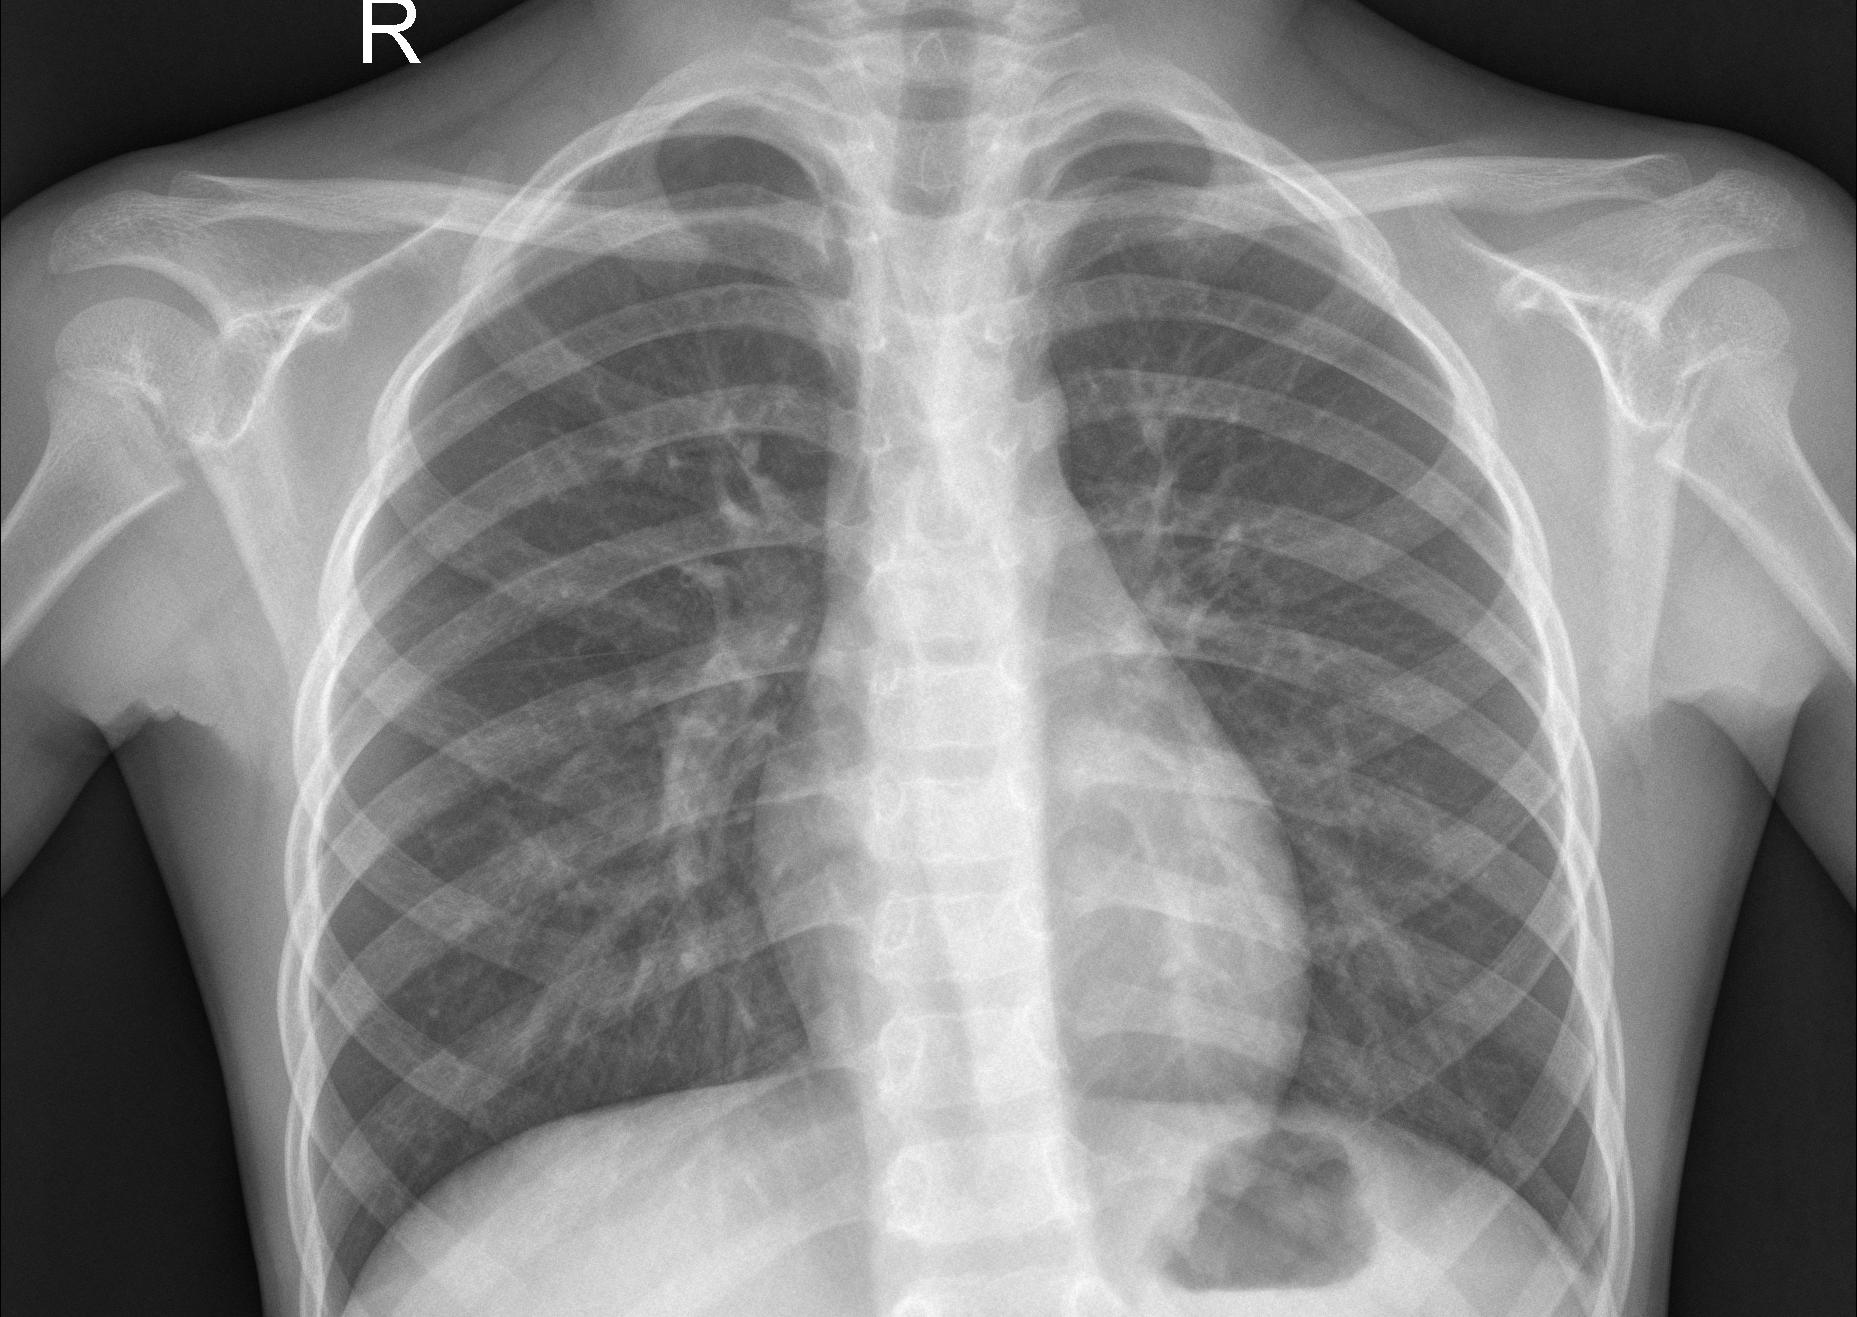

In [20]:
file_path_to_image_pil(test_normal[0])

<hr style="height:2px;color:black;">
Exploring data

In [21]:
image_temp = file_path_to_image_numpy(test_normal[0])
image_temp

array([[ 0, 32, 33, ..., 33, 34,  0],
       [ 0, 33, 33, ..., 34, 34,  0],
       [ 1, 33, 33, ..., 34, 34,  0],
       ...,
       [ 0, 28, 28, ..., 34, 35,  0],
       [ 0, 29, 28, ..., 34, 35,  0],
       [ 0, 29, 29, ..., 35, 34,  0]], dtype=uint8)

<hr style="height:2px;color:black;">
Exploring data

In [22]:
# matrix shape
image_temp.shape

(1317, 1857)

<hr style="height:2px;color:black;">
Exploring data

In [23]:
# resizing to (224,224)
image_temp = image_numpy_to_image_numpy_resize(image_temp)
image_temp

array([[32, 32, 32, ..., 32, 30, 35],
       [32, 32, 29, ..., 30, 33, 33],
       [32, 32, 34, ..., 32, 34, 31],
       ...,
       [32, 30, 28, ..., 33, 33, 32],
       [29, 27, 29, ..., 32, 33, 35],
       [31, 31, 29, ..., 33, 31, 34]], dtype=uint8)

<hr style="height:2px;color:black;">
Exploring data

In [24]:
image_temp.shape

(224, 224)

<hr style="height:2px;color:black;">
Exploring data

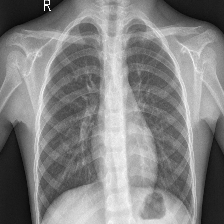

In [25]:
image_temp = image_numpy_to_image_pil(image_temp)
image_temp

<hr style="height:10px;color:blue">

<h1 style='color:blue' align='center'>Cleaning, Spliting and Normalizating<h1>

<hr style="height:2px;color:black;">
Spliting test, train and validation data

In [26]:
# 0 for normal and 1 for pneumonia

X_test, y_test, X_train, y_train = [],[],[],[]

def file_path_to_img_normalization(path):
    image = file_path_to_image_numpy(path)
    image = image_numpy_to_image_numpy_resize(image)
    return image
    
for file_path in test_normal:
    X_test.append(file_path_to_img_normalization(file_path))
    y_test.append(0)

for file_path in test_pneumonia:
    X_test.append(file_path_to_img_normalization(file_path))
    y_test.append(1)
    
for file_path in train_normal:
    X_train.append(file_path_to_img_normalization(file_path))
    y_train.append(0)
    
for file_path in train_pneumonia:
    X_train.append(file_path_to_img_normalization(file_path))
    y_train.append(1) 

<hr style="height:2px;color:black;">
Checking data

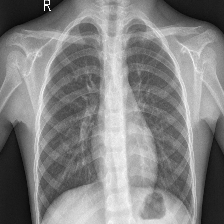

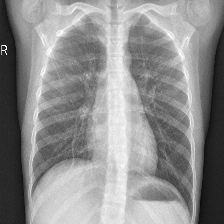

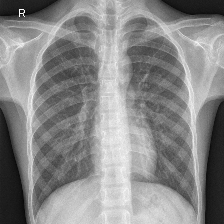

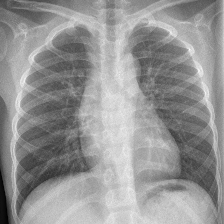

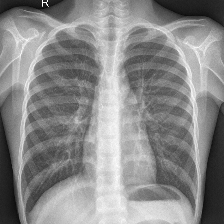

In [27]:
for img in X_test[0:5]:
    display(image_numpy_to_image_pil(img))

<hr style="height:2px;color:black;">
Checking how many images are RGB and Grayscale

In [28]:
RGB = 0
GREY = 0
Error = 0
for group in [X_test, X_train]:
    for image in group:
        if image.shape == (224, 224, 3):
            RGB+=1
        elif image.shape == (224, 224):
            GREY += 1
        else:
            print ("Error")
print("RGB=", RGB , "; GREY=",GREY, "; Error=",Error)

RGB= 283 ; GREY= 5557 ; Error= 0


<hr style="height:2px;color:black;">
Making every file as RGB

In [29]:
for i in range(len(X_test)):
    if X_test[i].shape == (224, 224):
        X_test[i] = np.repeat(X_test[i][:, :, np.newaxis], 3, axis=2)
        
for i in range(len(X_train)):
    if X_train[i].shape == (224, 224):
        X_train[i] = np.repeat(X_train[i][:, :, np.newaxis], 3, axis=2)

<hr style="height:2px;color:black;">
Testing if every dimention is equal

In [30]:
temp1 = X_test[0][:,:,0]
temp2 = X_test[0][:,:,1]
temp3 = X_test[0][:,:,2]
if (np.array_equal(temp1,temp2)) and (np.array_equal(temp1,temp3)):
    print("OK")
print(temp1,"\n",30*"-","\n",temp2,"\n",30*"-","\n",temp3)

OK
[[32 32 32 ... 32 30 35]
 [32 32 29 ... 30 33 33]
 [32 32 34 ... 32 34 31]
 ...
 [32 30 28 ... 33 33 32]
 [29 27 29 ... 32 33 35]
 [31 31 29 ... 33 31 34]] 
 ------------------------------ 
 [[32 32 32 ... 32 30 35]
 [32 32 29 ... 30 33 33]
 [32 32 34 ... 32 34 31]
 ...
 [32 30 28 ... 33 33 32]
 [29 27 29 ... 32 33 35]
 [31 31 29 ... 33 31 34]] 
 ------------------------------ 
 [[32 32 32 ... 32 30 35]
 [32 32 29 ... 30 33 33]
 [32 32 34 ... 32 34 31]
 ...
 [32 30 28 ... 33 33 32]
 [29 27 29 ... 32 33 35]
 [31 31 29 ... 33 31 34]]


<hr style="height:2px;color:black;">
Augmentation to avoid overfitting

In [31]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        brightness_range = (0.3,1),
        zca_whitening=False, 
        rotation_range=10,  
        zoom_range = 0.1, 
        horizontal_flip=True, 
        vertical_flip=False)  


datagen.fit(X_train)

<hr style="height:2px;color:black;">
Normalization the data

In [32]:
def normalization(image_np):
    return image_np/255

def undo_normalization():
    return (image_np*255).astype(np.uint8)

X_test_np = np.array(X_test)
X_train_np = np.array(X_train)

y_test_np = np.array(y_test)
y_train_np = np.array(y_train)

X_test_scaled = normalization(X_test_np)
X_train_scaled = normalization(X_train_np)

<hr style="height:2px;color:black;">
Shuffling the data

In [33]:
idx = np.random.permutation(len(X_test_scaled))
X_test_scaled_final ,y_test_final = X_test_scaled[idx], y_test_np[idx]

idx = np.random.permutation(len(X_train_scaled))
X_train_scaled_final ,y_train_final = X_train_scaled[idx], y_train_np[idx]

<hr style="height:10px;color:black;">

<h1 style='color:blue' align='center'>Resnet_v2 Model</h2>

<hr style="height:2px;color:black;">
Resnet_v2 Model for Transfer Learning

https://www.kaggle.com/models/google/resnet-v2

In [41]:
!pip install tensorflow-hub

  Obtaining dependency information for tensorflow-hub from https://files.pythonhosted.org/packages/e5/50/00dba77925bf2a0a1e45d7bcf8a69a1d2534fb4bb277d9010bd148d2235e/tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tf-keras>=2.14.1 from https://files.pythonhosted.org/packages/19/26/ca8a6cca61f2a44f1e7ee71ebdb9c8dfbc4371f418db811cdca4641f6daa/tf_keras-2.15.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -------------------- ------------------- 0.9/1.7 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 27.5 MB/s eta 0:00:00


In [42]:


#URL = "https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/101-classification/versions/2"
#feature_extractor = hub.KerasLayer(URL, input_shape=(224,224,3))
#feature_extractor.trainable = False
'''
from tensorflow.keras.models import load_model
loaded_model = load_model("resnet_v2")

feature_extractor = hub.KerasLayer(loaded_model,input_shape=(224,224,3))
feature_extractor.trainable = False
'''
import tensorflow_hub as hub

URL = "https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/101-classification/versions/2"
feature_extractor = hub.KerasLayer(URL, input_shape=(224,224,3))
feature_extractor.trainable = False

<hr style="height:2px;color:black;">
Creating the model

In [43]:
model = tf.keras.models.Sequential([    
    feature_extractor,
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              44677609  
                                                                 
 dense (Dense)               (None, 64)                64128     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 44742811 (170.68 MB)
Trainable params: 652

<hr style="height:2px;color:black;">
Training

In [44]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled_final, y_train_final, epochs=5)

Epoch 1/5



E:\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



163/163 [==============================] - 148s 866ms/step - loss: 0.2626 - acc: 0.8942
Epoch 2/5
163/163 [==============================] - 135s 829ms/step - loss: 0.1738 - acc: 0.9325
Epoch 3/5
163/163 [==============================] - 128s 784ms/step - loss: 0.1314 - acc: 0.9502
Epoch 4/5
163/163 [==============================] - 127s 780ms/step - loss: 0.1137 - acc: 0.9536
Epoch 5/5
163/163 [==============================] - 127s 782ms/step - loss: 0.1189 - acc: 0.9540


<hr style="height:2px;color:black;">
Evaluating

In [45]:
model.evaluate(X_test_scaled_final,y_test_final)

20/20 [==============================] - 17s 772ms/step - loss: 0.7848 - acc: 0.7933


[0.7848268747329712, 0.7932692170143127]

In [48]:
#

from tensorflow.keras.models import Sequential

model2 = Sequential()
for layer in model.layers[:-2]:
    model2.add(layer)
    print(layer.name,layer)
model2.summary()

keras_layer <tensorflow_hub.keras_layer.KerasLayer object at 0x000001F36A5DCA90>
dense <keras.src.layers.core.dense.Dense object at 0x000001F36A5AED50>
dropout <keras.src.layers.regularization.dropout.Dropout object at 0x000001F6D4CB57D0>
dense_1 <keras.src.layers.core.dense.Dense object at 0x000001F6D29A2F50>
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              44677609  
                                                                 
 dense (Dense)               (None, 64)                64128     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
Total 

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              44677609  
                                                                 
 dense (Dense)               (None, 64)                64128     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 44742811 (170.68 MB)
Trainable params: 652

In [49]:
model2.save('model2')

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


<hr style="height:10px;color:black;">

<h1 style='color:blue' align='center'>Inception_v3 Model</h2>

<hr style="height:2px;color:black;">
Getting inception_v3 for Transfer Learning

In [21]:
import tensorflow_hub as hub

URL = 'https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4' 
feature_extractor = hub.KerasLayer(URL, input_shape=(224,224,3))
feature_extractor.trainable = False

<hr style="height:2px;color:black;">
Creating the model

In [22]:
model = tf.keras.models.Sequential([    
    feature_extractor,
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 21934994 (83.68 MB)
Trainable params: 1322

<hr style="height:2px;color:black;">
Training

In [23]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled_final, y_train_final, epochs=5)

Epoch 1/5


D:\Python 3.11.1\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


163/163 [==============================] - 144s 734ms/step - loss: 0.3390 - acc: 0.8503
Epoch 2/5
163/163 [==============================] - 119s 729ms/step - loss: 0.2043 - acc: 0.9191
Epoch 3/5
163/163 [==============================] - 121s 742ms/step - loss: 0.1667 - acc: 0.9339
Epoch 4/5
163/163 [==============================] - 118s 725ms/step - loss: 0.1411 - acc: 0.9479
Epoch 5/5
163/163 [==============================] - 116s 713ms/step - loss: 0.1389 - acc: 0.9500


<hr style="height:2px;color:black;">
Evaluating

In [24]:
model.evaluate(X_test_scaled_final,y_test_final)

20/20 [==============================] - 15s 678ms/step - loss: 0.4456 - acc: 0.8574


[0.4456244707107544, 0.8573718070983887]